# 5 - Results
In this notebook, we will create plots for all the csources and RNAs in our dataset. Some of these figure were also used in the publication linked to this dataset. 

## 5.1 - Load data

In [181]:
import sys
from glob import glob
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import re
from matplotlib.ticker import MaxNLocator
import logging
import seaborn as sns

In [182]:
conditions = [
    {'label': 'LB', 'mu': 2.3},
    {'label': 'GLU', 'mu': 0.54},
    {'label': 'GLY', 'mu': 0.32},
    {'label': 'GAL', 'mu': 0.17},
    {'label': 'MAN', 'mu': 0.12},
]
mrna_ordered = ['rpoD', 'hipBA', 'rnlAB']
conditions_ordered = [c['label'] for c in conditions]
conditions_ordered

['LB', 'GLU', 'GLY', 'GAL', 'MAN']

In [183]:
logging.basicConfig(format='%(asctime)s [%(levelname)s] %(message)s ', datefmt='%m/%d/%Y %I:%M:%S%p', level=logging.INFO)
rootdir = "../tests/output-seg_ok"
logging.info(f'reading from directory {rootdir}')

dfs = []
for f in list(Path(rootdir).glob('*/results.csv')):
    logging.info(f'..loading file: {f}')
    df = pd.read_csv(f)
    dfs.append(df)
df = pd.concat(dfs).reset_index()
df.rename(columns={'index': 'cell_image_id'}, inplace=True)
df.rename(columns={'Unnamed: 0': 'cell_unique_id'}, inplace=True)
df['cell_unique_id'] = df.index

10/10/2024 12:33:31PM [INFO] reading from directory ../tests/output-seg_ok 
10/10/2024 12:33:31PM [INFO] ..loading file: ../tests/output-seg_ok/MG1655_GLY-lowOD-2nd_16/results.csv 
10/10/2024 12:33:31PM [INFO] ..loading file: ../tests/output-seg_ok/MG1655_MAN_OD_0.3_left_03/results.csv 
10/10/2024 12:33:31PM [INFO] ..loading file: ../tests/output-seg_ok/MG1655_GLY-lowOD-2nd_17/results.csv 
10/10/2024 12:33:31PM [INFO] ..loading file: ../tests/output-seg_ok/MG1655_GLU_OD_0.3_left_02/results.csv 
10/10/2024 12:33:31PM [INFO] ..loading file: ../tests/output-seg_ok/MG1655_GLU_OD_0.3_left_03/results.csv 
10/10/2024 12:33:31PM [INFO] ..loading file: ../tests/output-seg_ok/MG1655_LB_fixed2806_hybed1906_left_01/results.csv 
10/10/2024 12:33:31PM [INFO] ..loading file: ../tests/output-seg_ok/MG1655_GAL-lowOD-2nd_05/results.csv 
10/10/2024 12:33:31PM [INFO] ..loading file: ../tests/output-seg_ok/MG1655_MAN_OD_0.3_left_08/results.csv 
10/10/2024 12:33:31PM [INFO] ..loading file: ../tests/output-s

In [184]:
def split_parts(r):
    return re.compile(f'({"|".join(csources_ordered)})[-_]').split(r['condition'])[1:]

df[['csource', 'coverslip']] = df.apply(split_parts, axis=1, result_type='expand')

In [185]:
df

,cell_image_id,cell_unique_id,strain,condition,seqnr,mRNA,label,bbox-0,bbox-1,bbox-2,...,eccentricity,spots_per_cell,dense_regions_per_cell,decomposed_RNAs,tx_per_cell,nascent_RNAs,nuclei,total_RNAs_per_cell,csource,coverslip
0,0,0,MG1655,GLY-lowOD-2nd,16,hipBA,1,0,132,13,...,0.906318,0,0,0,0,0,0,0,GLY,lowOD-2nd
1,1,1,MG1655,GLY-lowOD-2nd,16,hipBA,2,0,166,26,...,0.703542,0,0,0,0,0,0,0,GLY,lowOD-2nd
2,2,2,MG1655,GLY-lowOD-2nd,16,hipBA,3,0,285,15,...,0.662441,0,0,0,0,0,0,0,GLY,lowOD-2nd
3,3,3,MG1655,GLY-lowOD-2nd,16,hipBA,4,0,352,37,...,0.901058,0,0,0,0,0,0,0,GLY,lowOD-2nd
4,4,4,MG1655,GLY-lowOD-2nd,16,hipBA,5,3,724,23,...,0.956918,0,0,0,0,0,0,0,GLY,lowOD-2nd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61291,3640,61291,MG1655,GAL-lowOD-2nd,6,rpoD,1211,2266,1445,2297,...,0.888935,0,0,0,0,0,0,0,GAL,lowOD-2nd
61292,3641,61292,MG1655,GAL-lowOD-2nd,6,rpoD,1212,2268,1274,2291,...,0.840455,0,0,0,0,0,0,0,GAL,lowOD-2nd
61293,3642,61293,MG1655,GAL-lowOD-2nd,6,rpoD,1213,2268,1749,2293,...,0.901456,0,0,0,0,0,0,0,GAL,lowOD-2nd
61294,3643,61294,MG1655,GAL-lowOD-2nd,6,rpoD,1214,2287,196,2303,...,0.793655,0,0,0,0,0,0,0,GAL,lowOD-2nd


In [186]:
# inspect data
df.columns

Index(['cell_image_id', 'cell_unique_id', 'strain', 'condition', 'seqnr',
       'mRNA', 'label', 'bbox-0', 'bbox-1', 'bbox-2', 'bbox-3', 'area',
       'eccentricity', 'spots_per_cell', 'dense_regions_per_cell',
       'decomposed_RNAs', 'tx_per_cell', 'nascent_RNAs', 'nuclei',
       'total_RNAs_per_cell', 'csource', 'coverslip'],
      dtype='object')

In [187]:
mRNAs = df['mRNA'].unique()
csources = df['csource'].unique()
strains = df['strain'].unique()
seqnrs = df['seqnr'].unique() 
mRNAs, csources, strains, seqnrs

(array(['hipBA', 'rnlAB', 'rpoD'], dtype=object),
 array(['GLY', 'MAN', 'GLU', 'LB', 'GAL'], dtype=object),
 array(['MG1655'], dtype=object),
 array([16,  3, 17,  2,  1,  5,  8,  7, 12,  6]))

### Checking cell ids:

In [188]:
df.groupby(['strain', 'csource', 'seqnr'])['cell_image_id'].min()


strain  csource  seqnr
MG1655  GAL      1        0
                 5        0
                 6        0
        GLU      1        0
                 2        0
                 3        0
        GLY      8        0
                 16       0
                 17       0
        LB       1        0
                 3        0
                 5        0
        MAN      3        0
                 7        0
                 8        0
                 12       0
Name: cell_image_id, dtype: int64

In [189]:
df.groupby(['strain', 'csource', 'seqnr'])['cell_unique_id'].min()


strain  csource  seqnr
MG1655  GAL      1        53103
                 5        23211
                 6        57651
        GLU      1        34179
                 2         7365
                 3        13965
        GLY      8        48138
                 16           0
                 17        3132
        LB       1        19737
                 3        29982
                 5        44334
        MAN      3         1518
                 7        27702
                 8        25920
                 12       42507
Name: cell_unique_id, dtype: int64

In [190]:
df.groupby(['strain', 'csource', 'seqnr'])['cell_unique_id'].max()


strain  csource  seqnr
MG1655  GAL      1        57650
                 5        25919
                 6        61295
        GLU      1        42506
                 2        13964
                 3        19736
        GLY      8        53102
                 16        1517
                 17        7364
        LB       1        23210
                 3        34178
                 5        48137
        MAN      3         3131
                 7        29981
                 8        27701
                 12       44333
Name: cell_unique_id, dtype: int64

### Cells per csource:

In [191]:
df.groupby(['strain', 'csource', 'seqnr']).size()


strain  csource  seqnr
MG1655  GAL      1        4548
                 5        2709
                 6        3645
        GLU      1        8328
                 2        6600
                 3        5772
        GLY      8        4965
                 16       1518
                 17       4233
        LB       1        3474
                 3        4197
                 5        3804
        MAN      3        1614
                 7        2280
                 8        1782
                 12       1827
dtype: int64

In [192]:
df.groupby(['strain', 'csource']).size()


strain  csource
MG1655  GAL        10902
        GLU        20700
        GLY        10716
        LB         11475
        MAN         7503
dtype: int64

### Cell area:

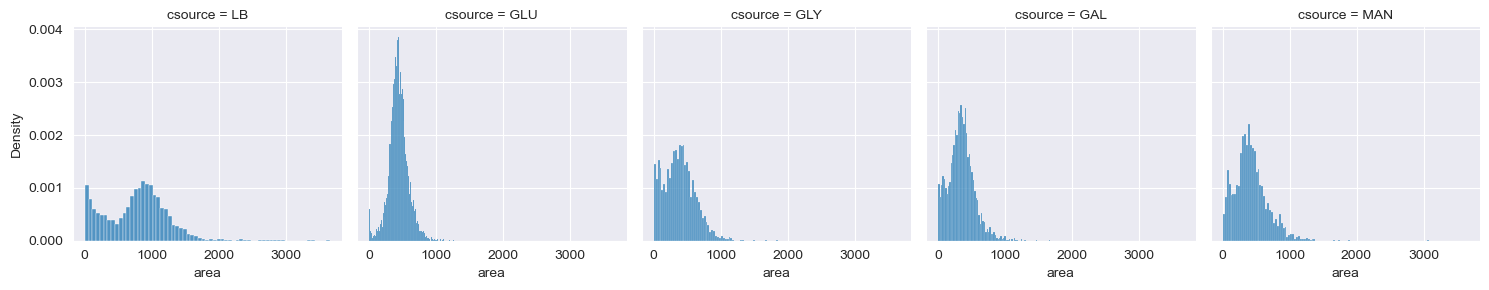

In [193]:
g = sns.FacetGrid(df, col='csource', col_order=csources_ordered)
g.map_dataframe(sns.histplot, x='area', stat='density');

### Cell eccentricity:

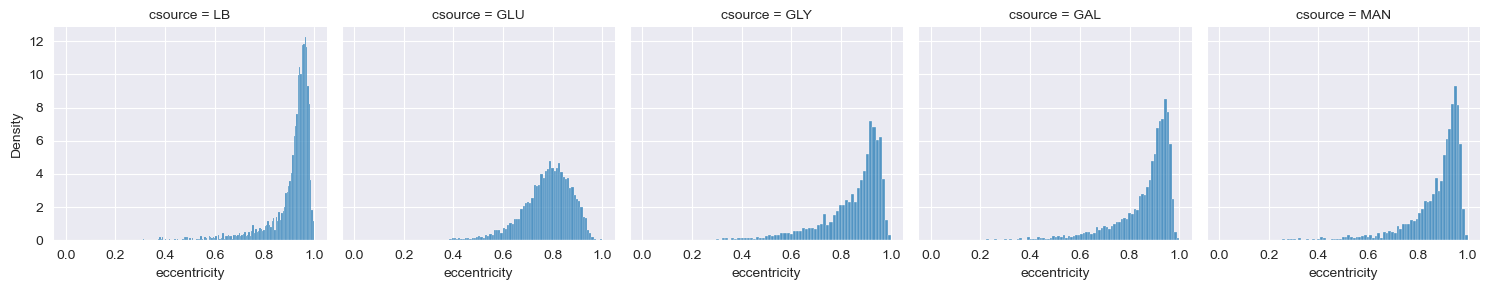

In [194]:
g = sns.FacetGrid(df, col='csource', col_order=csources_ordered)
g.map_dataframe(sns.histplot, x='eccentricity', stat='density');

### mRNAs per cell:

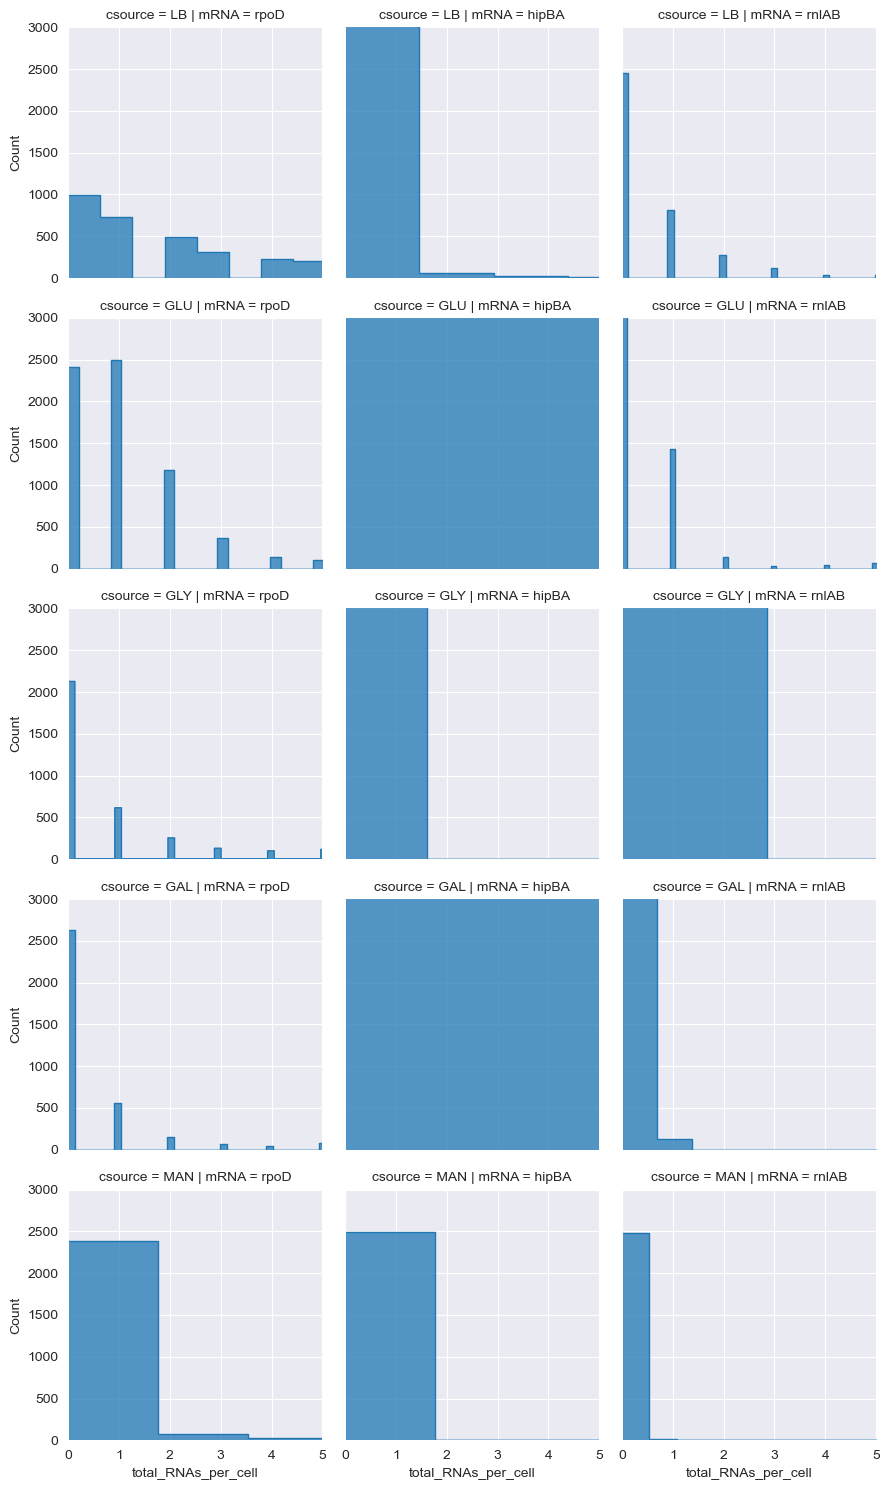

In [195]:
g = sns.FacetGrid(df, col='mRNA', col_order=mrna_ordered, row='csource', row_order=csources_ordered, 
                  xlim=(0, 5), ylim=(0, 3000), sharex=True, sharey=True);
g.map_dataframe(sns.histplot, x='total_RNAs_per_cell', element='step');
# g.set(xlim=(0, 5));

### Txs per cell:

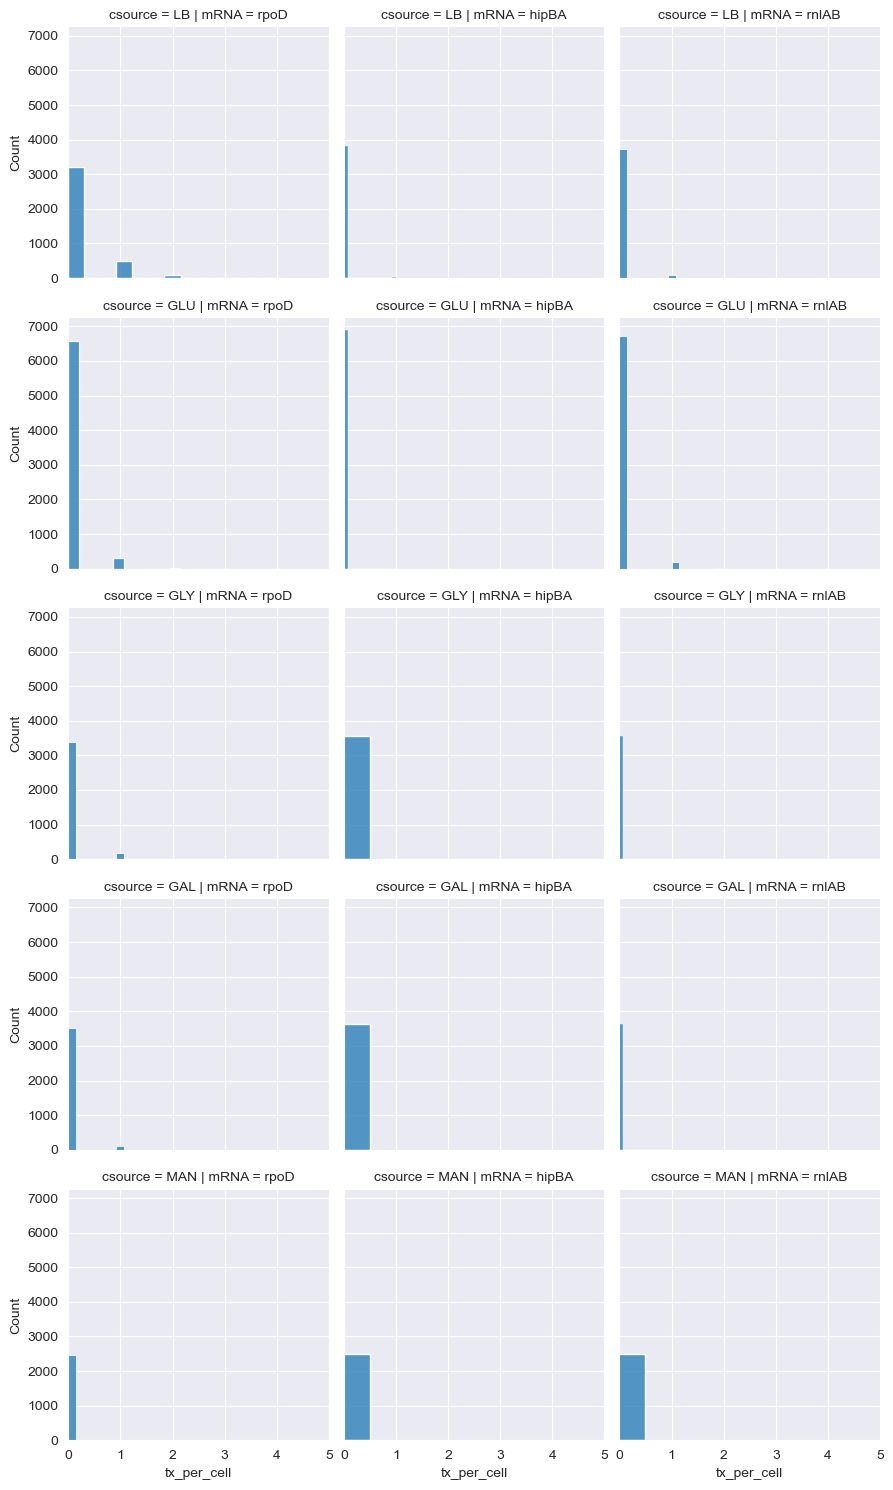

In [196]:
g = sns.FacetGrid(df, col='mRNA', col_order=mrna_ordered, row='csource', row_order=csources_ordered )
g.map_dataframe(sns.histplot, x='tx_per_cell')
g.set(xlim=(0, 5));
